# <font color='green'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

**There will be some functions that start with the word "grader" ex: grader_weights(), grader_sigmoid(), grader_logloss() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<font color='green'> Importing packages</font>

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

<font color='green'>Creating custom dataset</font>

In [5]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [6]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='green'>Splitting data into train and test </font>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

### <font color='green'>Initialize weights </font>

In [9]:
def initialize_weights(row_vector):
    ''' we will initializing our weights and bias'''
    w=np.zeros_like(row_vector)
    b=0
    return w,b

In [10]:
initialize_weights(X[0])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 0)

In [11]:
dim=X_train[0] 
w,b = initialize_weights(X[0])
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


### <font color='green'>Compute sigmoid </font>

In [12]:
from math import *
def sigmoid(z):
    '''  we will return sigmoid of z'''
    # compute sigmoid(z) and returnz
    return 1/(1+np.exp(-z))

In [13]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

### <font color='green'>Compute logloss </font>

In [14]:
def logloss(y_true,y_pred):
    loss=-1*np.mean(y_true*np.log10(y_pred)+(1-y_true)*np.log10(1-y_pred))
    return loss

In [15]:
def grader_logloss(true,pred):
  loss=logloss(true,pred)
  assert(np.round(loss,6)==0.076449)
  return True
true=np.array([1,1,0,1,0])
pred=np.array([0.9,0.8,0.1,0.8,0.2])
grader_logloss(true,pred)

True

### <font color='green'>Compute gradient w.r.t 'w' </font>

In [16]:
def gradient_dw(x,y,w,b,alpha,N):
    ''' we will compute the gardient w.r.to w '''
    dw= ((x*((y-sigmoid(np.dot(w.T,x) + b)))-((alpha/N)*w)))
    return dw

In [17]:
def grader_dw(x,y,w,b,alpha,N):
  grad_dw=gradient_dw(x,y,w,b,alpha,N)
  assert(np.round(np.sum(grad_dw),5)==4.75684)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w=np.array([ 0.03364887,  0.03612727,  0.02786927,  0.08547455, -0.12870234,
       -0.02555288,  0.11858013,  0.13305576,  0.07310204,  0.15149245,
       -0.05708987, -0.064768  ,  0.18012332, -0.16880843, -0.27079877])
grad_b=0.5
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

### <font color='green'>Compute gradient w.r.t 'b' </font>

In [18]:
def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     db=y-sigmoid(np.dot(w,x)+b)
     return db

In [19]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(np.round(grad_db,4)==-0.3714)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0.5
grad_b=0.1
grad_w=np.array([ 0.03364887,  0.03612727,  0.02786927,  0.08547455, -0.12870234,
       -0.02555288,  0.11858013,  0.13305576,  0.07310204,  0.15149245,
       -0.05708987, -0.064768  ,  0.18012332, -0.16880843, -0.27079877])
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

### <font color='green'>Logistic Regression </font>

In [21]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' we will implementing logistic regression from scratch'''
    train_loss = []
    test_loss = []
    w,b = initialize_weights(X_train[0]) # Initializing the weights
    
    for i in tqdm(range(epochs)):
      for k,j in zip(X_train,y_train):
        dw=gradient_dw(k,j,w,b,alpha,1)
        db=gradient_db(k,j,w,b)
        w=w+eta0*dw           #updating w, b
        b=b+eta0*db  
      predicted_train=pred(w,b,X_train)
      train_loss.append(logloss(y_train,predicted_train)) # storing all the train loss values in a list
      predicted_test=pred(w,b,X_test)
      test_loss.append(logloss(y_test,predicted_test))    # storing all the train loss values in a list
      print("epochs {}".format(i))
      print("train loss {}".format(train_loss[i]))
      print("test loss {}".format(test_loss[i]))
    return w,b,train_loss,test_loss

In [22]:
from tqdm import tqdm
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=20
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

  5%|████▏                                                                              | 1/20 [00:01<00:37,  1.98s/it]

epochs 0
train loss 0.1754606247360309
test loss 0.17595770726331647


 10%|████████▎                                                                          | 2/20 [00:03<00:35,  2.00s/it]

epochs 1
train loss 0.16867416744464175
test loss 0.16940149097552995


 15%|████████████▍                                                                      | 3/20 [00:05<00:32,  1.94s/it]

epochs 2
train loss 0.1663936302047816
test loss 0.16720724323524605


 20%|████████████████▌                                                                  | 4/20 [00:08<00:33,  2.08s/it]

epochs 3
train loss 0.1653697408374924
test loss 0.16621787754164866


 25%|████████████████████▊                                                              | 5/20 [00:10<00:32,  2.16s/it]

epochs 4
train loss 0.1648581973924498
test loss 0.1657198487150934


 30%|████████████████████████▉                                                          | 6/20 [00:12<00:29,  2.08s/it]

epochs 5
train loss 0.1645890763819657
test loss 0.1654555081976047


 35%|█████████████████████████████                                                      | 7/20 [00:14<00:26,  2.06s/it]

epochs 6
train loss 0.16444340426111953
test loss 0.1653110544953986


 40%|█████████████████████████████████▏                                                 | 8/20 [00:16<00:24,  2.01s/it]

epochs 7
train loss 0.16436318230671837
test loss 0.16523069542312474


 45%|█████████████████████████████████████▎                                             | 9/20 [00:18<00:22,  2.01s/it]

epochs 8
train loss 0.16431849940861387
test loss 0.1651854473080727


 50%|█████████████████████████████████████████                                         | 10/20 [00:20<00:20,  2.06s/it]

epochs 9
train loss 0.16429340952198623
test loss 0.16515973510755802


 55%|█████████████████████████████████████████████                                     | 11/20 [00:22<00:18,  2.05s/it]

epochs 10
train loss 0.16427923378687076
test loss 0.16514501157574715


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:24<00:16,  2.02s/it]

epochs 11
train loss 0.1642711834339083
test loss 0.16513652026883494


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:26<00:13,  2.00s/it]

epochs 12
train loss 0.16426659068998162
test loss 0.1651315878603367


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:28<00:11,  1.97s/it]

epochs 13
train loss 0.1642639588605032
test loss 0.16512870040110492


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:30<00:09,  1.97s/it]

epochs 14
train loss 0.16426244369614623
test loss 0.16512699518042384


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:32<00:07,  2.00s/it]

epochs 15
train loss 0.16426156688862956
test loss 0.16512597788517092


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:34<00:05,  1.96s/it]

epochs 16
train loss 0.1642610564389263
test loss 0.16512536379282627


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:36<00:03,  1.95s/it]

epochs 17
train loss 0.16426075714134006
test loss 0.16512498801128778


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:38<00:01,  1.98s/it]

epochs 18
train loss 0.16426058013656883
test loss 0.1651247544742231


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:40<00:00,  2.01s/it]

epochs 19
train loss 0.1642604743701081
test loss 0.16512460682798147


In [51]:
print(w)
print(b)

[-4.29140945e-01  1.92805460e-01 -1.48151251e-01  3.37889601e-01
 -2.20518861e-01  5.69311482e-01 -4.45010836e-01 -8.99621603e-02
  2.21483121e-01  1.73425928e-01  1.98413267e-01 -4.20765000e-04
 -8.10591107e-02  3.38895504e-01  2.29521948e-02]
-0.8895989285186564


### <font color='green'>Plotting Test and Training loss corresponding to Epochs </font>

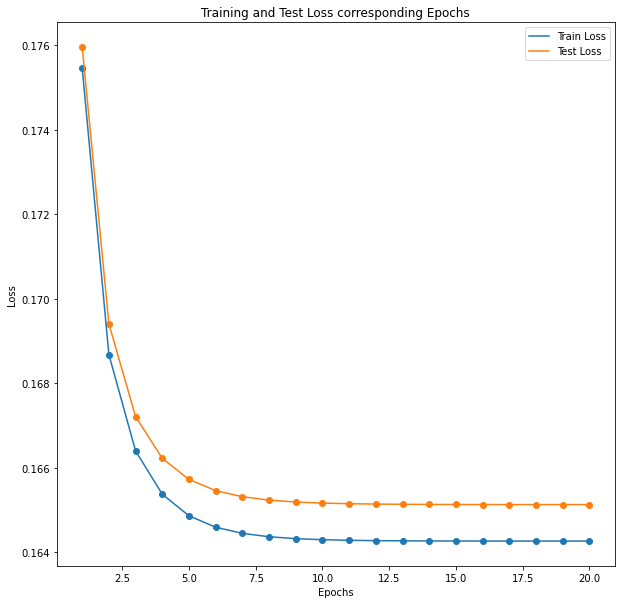

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.plot(range(1,epochs+1),train_loss)
plt.plot(range(1,epochs+1),test_loss)
plt.scatter(range(1,epochs+1),train_loss)
plt.scatter(range(1,epochs+1),test_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss corresponding Epochs")
labels = ["Train Loss" , "Test Loss"]
plt.legend(labels, loc = "upper right")
plt.show()

In [32]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print("Training Accuracy without Sklearn Implemetation : {0}".format(1-np.sum(y_train - pred(w,b,X_train))/len(X_train)))
print("Test Accuracy Without Sklearn Implementation : {0}".format(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test)))

Training Accuracy without Sklearn Implemetation : 0.9523733333333333
Test Accuracy Without Sklearn Implementation : 0.95024
